<a href="https://colab.research.google.com/github/jgamiranda/MVP1_PUCRIO/blob/main/MVP_SPRINT_2_JM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. MODELO DE REGRESSÃO

### A) Problema de Regressão
Dataset Utilizado: Expectativa de Vida (WHO) https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

### A.1) Breve descrição do dataset:
O dataset reúne diversos atributos com métricas de caráter socioeconômico para países desenvolvidos e sub-desenvolvidos (X) tendo como variável target a expectativa de vida em cada um dos países (Y), abrangendo o período de 2000 a 2015

### B) Descrição do Problema
Utilizei o Método de Regressão Linear Múltipla para fazer um modelo de predição de Expectativa de Vida para países desenvolvidos, de acordo com atributos selecionados. Além disso, evitei fazer um modelo que utilizasse tanto países desenvolvidos quanto subdesenvolvidos, visto que poderia gerar problemas de especificação

### C) Restrições do dataset:
Uma parte relevante dos dados referentes à expectativa de vida (variável target) de países sub-desenvolvidos não foi coletado

In [ ]:
#importando o dataset
import pandas as pd

dataset = pd.read_csv("Life Expectancy Data.csv")
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# A.1 PRÉ PROCESSAMENTO DE DADOS E ANÁLISE EXPLORATÓRIA DE DADOS

In [ ]:
# checando estatísticas básicas do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
# tabela acerca dos dados estatísticos do dataset
dataset.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [ ]:
# percentual de dados nulos e não nulos
import numpy as np
dataset.replace("", np.nan, inplace = True)

total_entradas = int(len(dataset))
perc_na = (dataset.isna().sum()/total_entradas) * 100
perc_na = perc_na.round(2)

resumo_na = pd.DataFrame({"Atributo":dataset.columns.tolist(), "Valores Faltantes": dataset.isna().sum(), "% de Valores Faltantes": perc_na})

print(resumo_na.to_string(index=False))

                       Atributo  Valores Faltantes  % de Valores Faltantes
                        Country                  0                    0.00
                           Year                  0                    0.00
                         Status                  0                    0.00
               Life expectancy                  10                    0.34
                Adult Mortality                 10                    0.34
                  infant deaths                  0                    0.00
                        Alcohol                194                    6.60
         percentage expenditure                  0                    0.00
                    Hepatitis B                553                   18.82
                       Measles                   0                    0.00
                           BMI                  34                    1.16
             under-five deaths                   0                    0.00
                         

Alguns dos atributos, como Hepatite B, Produto Interno Bruto (GDP) e População, possuemm grande quantidade de dados faltantes. É preciso checar a distribuição desses valores faltantes entre **países desenvolvidos** e **subdesenvolvidos**.

In [ ]:
# definindo função para calcular percentual por coluna
def perc_na_2(column):
   return(column.isna().sum()/len(column)) * 100

# agrupando dataset de acordo com tipo de país
agrupado_na = dataset.groupby("Status").apply(perc_na_2)

tabela_na = agrupado_na.unstack().transpose()
tabela_na = tabela_na.round(2)

print(tabela_na)

                                 Status    
Country                          Developed      0.00
                                 Developing     0.00
Year                             Developed      0.00
                                 Developing     0.00
Status                           Developed      0.00
                                 Developing     0.00
Life expectancy                  Developed      0.00
                                 Developing     0.41
Adult Mortality                  Developed      0.00
                                 Developing     0.41
infant deaths                    Developed      0.00
                                 Developing     0.00
Alcohol                          Developed      5.47
                                 Developing     6.84
percentage expenditure           Developed      0.00
                                 Developing     0.00
Hepatitis B                      Developed     33.79
                                 Developing    15.66
Me

In [ ]:
# criando um dataset considerando apenas os paises desenvolvidos
developed = dataset[dataset["Status"] == "Developed"]
developed.reset_index(drop=True, inplace = True)
developed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,93.0,74,...,93.0,NaN,93.0,0.1,56554.38760,23789338.0,0.6,0.6,0.937,20.4
1,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,91.0,340,...,92.0,9.42,92.0,0.1,62214.69120,2346694.0,0.6,0.6,0.936,20.4
2,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,91.0,158,...,91.0,9.36,91.0,0.1,67792.33860,23117353.0,0.6,0.6,0.933,20.3
3,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,91.0,199,...,92.0,9.36,92.0,0.1,67677.63477,22728254.0,0.6,0.6,0.930,20.1
4,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,92.0,190,...,92.0,9.20,92.0,0.1,62245.12900,223424.0,0.6,0.6,0.927,19.8


In [ ]:
developed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          512 non-null    object 
 1   Year                             512 non-null    int64  
 2   Status                           512 non-null    object 
 3   Life expectancy                  512 non-null    float64
 4   Adult Mortality                  512 non-null    float64
 5   infant deaths                    512 non-null    int64  
 6   Alcohol                          484 non-null    float64
 7   percentage expenditure           512 non-null    float64
 8   Hepatitis B                      339 non-null    float64
 9   Measles                          512 non-null    int64  
 10   BMI                             512 non-null    float64
 11  under-five deaths                512 non-null    int64  
 12  Polio                 

In [ ]:
developed.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,512.000000,512.000000,512.000000,512.000000,484.000000,512.000000,339.000000,512.000000,512.000000,512.000000,512.000000,480.000000,512.000000,5.120000e+02,448.000000,4.160000e+02,512.000000,512.000000,464.000000,464.000000
mean,2007.500000,79.197852,79.685547,1.494141,9.826736,2703.600380,88.041298,499.005859,51.803906,1.810547,93.736328,7.554042,93.476562,1.000000e-01,22053.386446,6.830053e+06,1.320703,1.296680,0.852489,15.845474
std,4.614281,3.930942,47.877583,4.585774,2.765858,3824.200588,20.489240,2529.084588,17.196829,5.384006,10.783713,2.984389,12.531113,1.389136e-17,22870.827763,1.479524e+07,0.756577,0.829099,0.052843,1.766799
min,2000.000000,69.900000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,3.200000,0.000000,9.000000,1.100000,9.000000,1.000000e-01,12.277330,1.230000e+02,0.300000,0.200000,0.703000,11.500000
25%,2003.750000,76.800000,58.000000,0.000000,8.617500,92.904052,89.000000,0.000000,53.775000,0.000000,93.000000,6.407500,93.750000,1.000000e-01,3875.740910,1.993282e+05,0.700000,0.600000,0.815000,14.700000
50%,2007.500000,79.250000,73.000000,0.000000,10.320000,846.615644,95.000000,12.000000,57.450000,0.000000,96.000000,7.895000,96.000000,1.000000e-01,13560.723860,1.167660e+06,1.100000,1.000000,0.862000,15.800000
75%,2011.250000,81.700000,96.000000,1.000000,11.697500,4102.863046,97.000000,96.500000,61.300000,2.000000,98.000000,9.212500,98.000000,1.000000e-01,36760.425993,5.759450e+06,1.900000,1.900000,0.894000,16.800000
max,2015.000000,89.000000,229.000000,28.000000,15.190000,19479.911610,99.000000,33812.000000,69.600000,33.000000,99.000000,17.600000,99.000000,1.000000e-01,119172.741800,8.253418e+07,4.000000,4.300000,0.948000,20.700000


In [ ]:
total_entradas = int(len(developed))
perc_na = (developed.isna().sum()/total_entradas) * 100
perc_na = perc_na.round(2)

resumo_na = pd.DataFrame({"Atributo":developed.columns.tolist(), "Valores Faltantes": developed.isna().sum(), "% de Valores Faltantes": perc_na})

print(resumo_na.to_string(index=False))

                       Atributo  Valores Faltantes  % de Valores Faltantes
                        Country                  0                    0.00
                           Year                  0                    0.00
                         Status                  0                    0.00
               Life expectancy                   0                    0.00
                Adult Mortality                  0                    0.00
                  infant deaths                  0                    0.00
                        Alcohol                 28                    5.47
         percentage expenditure                  0                    0.00
                    Hepatitis B                173                   33.79
                       Measles                   0                    0.00
                           BMI                   0                    0.00
             under-five deaths                   0                    0.00
                         

Primeiramente, vou estabelecer o corte de exclusão dos atributos que estejam com acima de **10% dos valores faltantes**. Para os demais valores faltantes nas colunas que ainda possuem dados faltantes, removerei as linhas de entrada.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
# determinando limite de percentual faltante
limite_perc = developed.isna().mean() * 100
max_perc = 10
cols_remover = limite_perc[limite_perc > max_perc].index
developed.drop(cols_remover, axis =1, inplace = True)
developed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Australia,2015,Developed,82.8,59.0,1,NaN,0.00000,74,66.6,1,93.0,NaN,93.0,0.1,0.6,0.6,0.937,20.4
1,Australia,2014,Developed,82.7,6.0,1,9.71,10769.36305,340,66.1,1,92.0,9.42,92.0,0.1,0.6,0.6,0.936,20.4
2,Australia,2013,Developed,82.5,61.0,1,9.87,11734.85381,158,65.5,1,91.0,9.36,91.0,0.1,0.6,0.6,0.933,20.3
3,Australia,2012,Developed,82.3,61.0,1,10.03,11714.99858,199,65.0,1,92.0,9.36,92.0,0.1,0.6,0.6,0.930,20.1
4,Australia,2011,Developed,82.0,63.0,1,10.30,10986.26527,190,64.4,1,92.0,9.20,92.0,0.1,0.6,0.6,0.927,19.8


In [ ]:
total_entradas = int(len(developed))
perc_na = (developed.isna().sum()/total_entradas) * 100
perc_na = perc_na.round(2)

resumo_na = pd.DataFrame({"Atributo":developed.columns.tolist(), "Valores Faltantes": developed.isna().sum(), "% de Valores Faltantes": perc_na})

print(resumo_na.to_string(index=False))

                       Atributo  Valores Faltantes  % de Valores Faltantes
                        Country                  0                    0.00
                           Year                  0                    0.00
                         Status                  0                    0.00
               Life expectancy                   0                    0.00
                Adult Mortality                  0                    0.00
                  infant deaths                  0                    0.00
                        Alcohol                 28                    5.47
         percentage expenditure                  0                    0.00
                       Measles                   0                    0.00
                           BMI                   0                    0.00
             under-five deaths                   0                    0.00
                          Polio                  0                    0.00
              Total expen

Para os valores remanescentes faltantes, cujo percentual da frequência total dos atributos não ultrapassa 20%, usarei SimpleImputer para preencher com as respectivas médias e adaptar o dataset.


In [ ]:
# utilizando o simple imputer
from sklearn.impute import SimpleImputer

cols = ["Alcohol", "Total expenditure", "Income composition of resources", "Schooling"]

imputer = SimpleImputer(strategy="mean")
developed[cols] = imputer.fit_transform(developed[cols])

print(developed.isnull().sum())

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


Checarei a matriz de correlação acerca dos seguintes atributos, a fim de entender se é possível utilizá-los como atributos para um modelo de predição de expectativa de vida sem incorrer em multicolinearidade:

1.   Adult Mortality
3.   Polio
4.   Alcohol
5.   Schooling



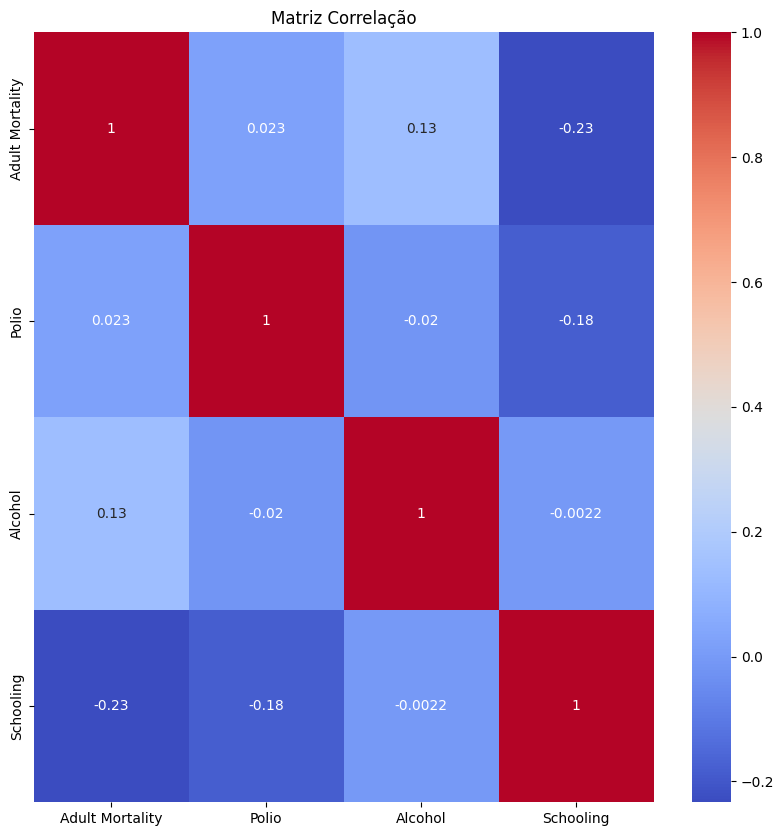

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cols_checar = ["Adult Mortality", "Polio", "Alcohol", "Schooling"]

subconjunto = developed[cols_checar]
matriz_corr = subconjunto.corr()


plt.figure(figsize=(10, 10))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm" )
plt.title("Matriz Correlação")
plt.show()

Dado que as colunas selecionadas não possuem correlação alta entre si, criarei um novo dataframe para ser treinado e tendo como variável target a Expectativa de Vida em países desenvolvidos.

Text(0.5, 1.0, 'Adult Mortality vs. Country')

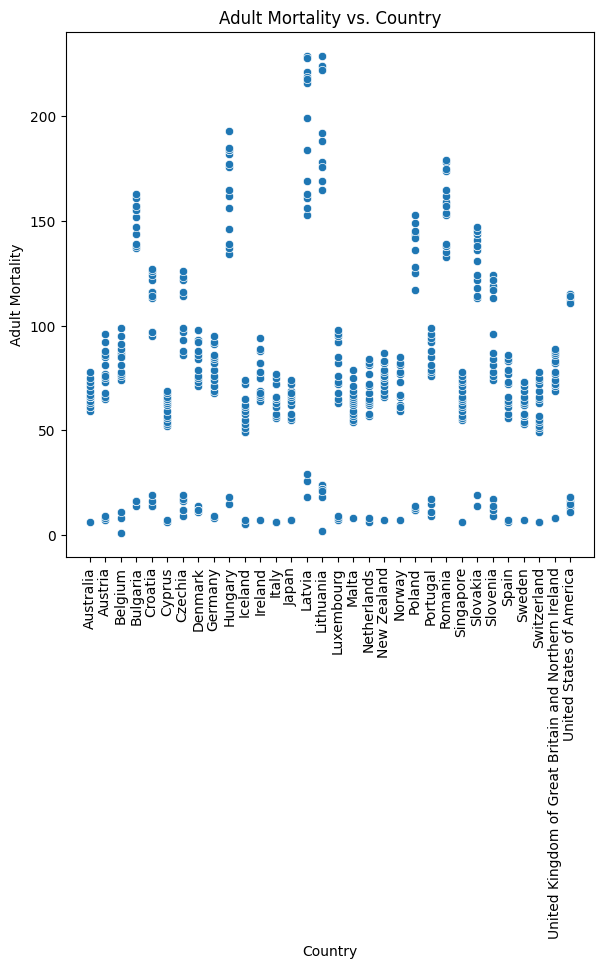

In [ ]:
# criando novo dataframe com atributos selecionados
cols_selecionadas = ["Adult Mortality", "Polio", "Alcohol", "Schooling", "Country", "Life expectancy "]
developed_2 = developed[cols_selecionadas].copy()

# scatterplot agrupando país vs. mortalidade
plt.figure(figsize=(15,15))
plt.subplot
plt.subplot(2, 2, 1)
sns.scatterplot(x="Country", y="Adult Mortality", data=developed_2)
plt.xticks(rotation=90)
plt.title("Adult Mortality vs. Country")

Text(0.5, 1.0, 'Polio vs. Country')

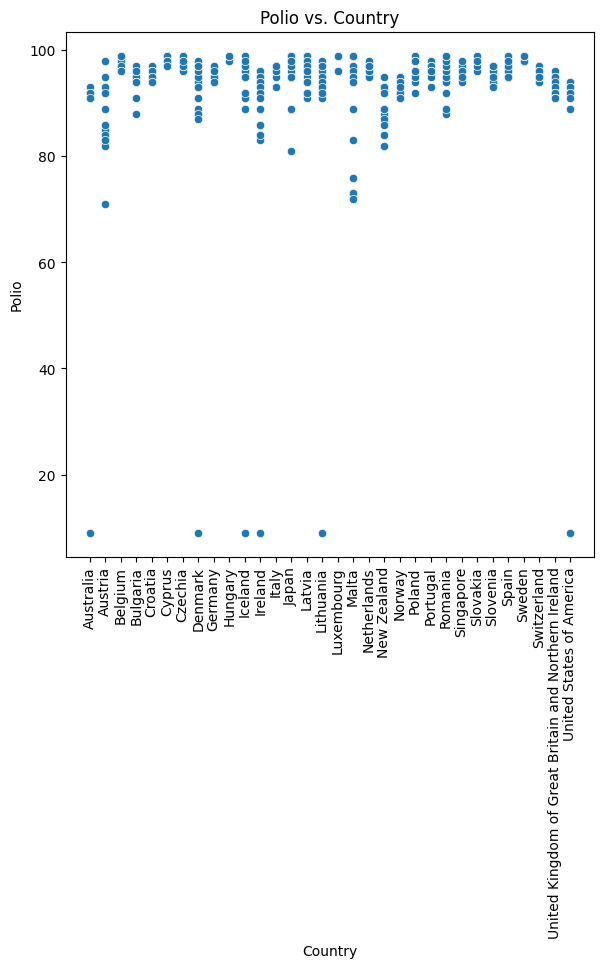

In [ ]:
# scatterplot agrupando país vs. poliomelite
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 2)
sns.scatterplot(x="Country", y="Polio", data=developed_2)
plt.xticks(rotation=90)
plt.title("Polio vs. Country")

Text(0.5, 1.0, 'Alcohol vs. Country')

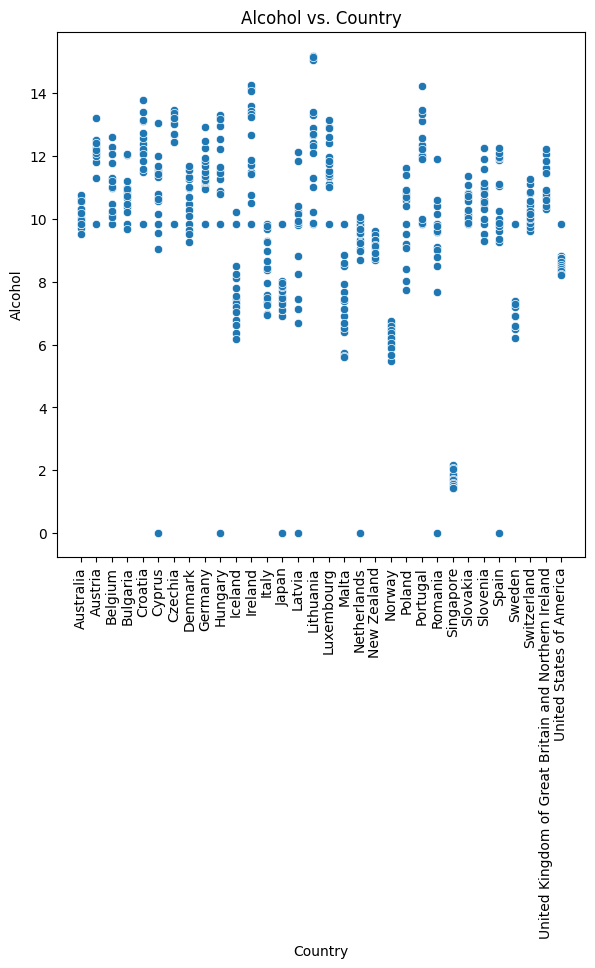

In [ ]:
# scatterplot agrupando país vs. consumo de álcool
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 3)
sns.scatterplot(x="Country", y="Alcohol", data=developed_2)
plt.xticks(rotation=90)
plt.title("Alcohol vs. Country")

Text(0.5, 1.0, 'Schooling vs. Country')

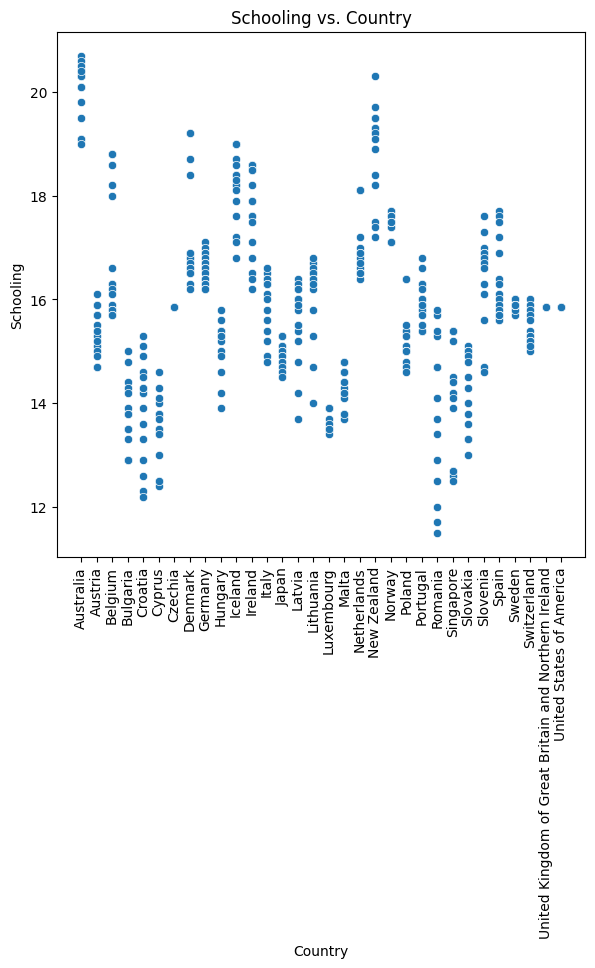

In [ ]:
# scatterplot agrupando país vs. anos de educação escolar
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 4)
sns.scatterplot(x="Country", y="Schooling", data=developed_2)
plt.xticks(rotation=90)
plt.title("Schooling vs. Country")

Text(0.5, 1.0, 'Expectativa de Vida vs. País')

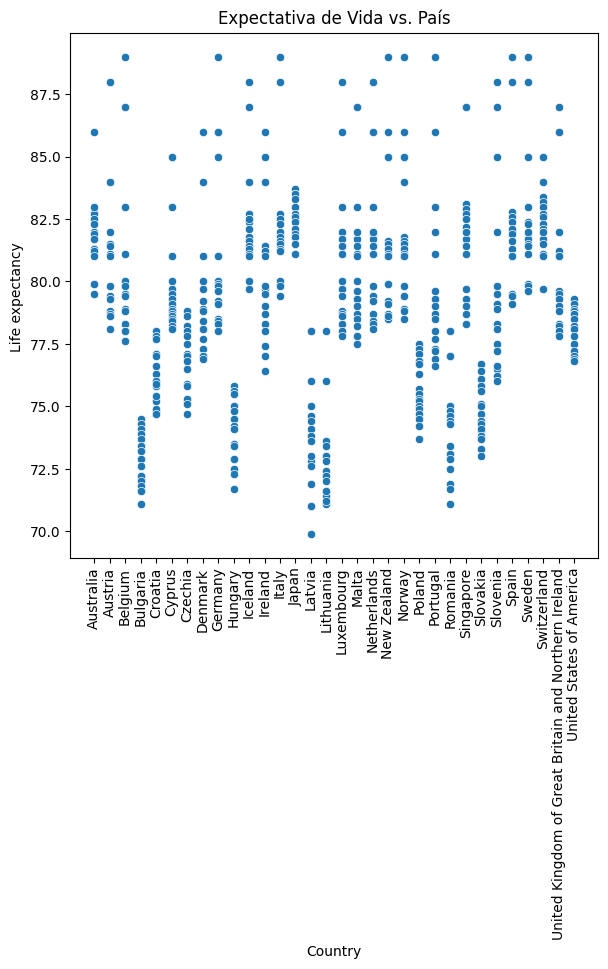

In [ ]:
# checando distribuição de Expectativa de Vida por País Desenvolvido
plt.figure(figsize=(15,15))
plt.subplot(2, 2, 4)
sns.scatterplot(x="Country", y="Life expectancy ", data=developed_2)
plt.xticks(rotation=90)
plt.title("Expectativa de Vida vs. País")

Utilizarei o dataframe "developed_2" para treinar um modelo de predição.

# A.2 TREINAMENTO DE MODELO DE PREDIÇÃO


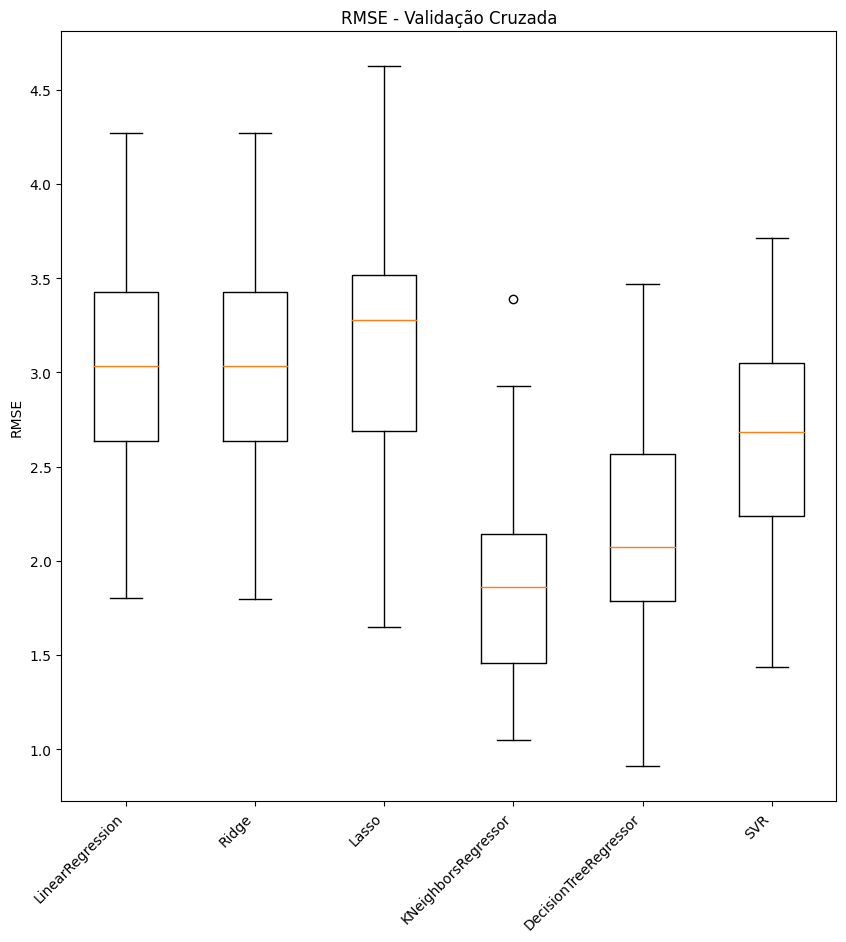

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# separação das colunas entre atributos e variável target
x = developed_2.drop(columns=["Life expectancy ", "Country"])
y = developed_2["Life expectancy "]

# separação dos dados entre treino (80%) e teste (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

# validação cruzada
folds = 20
kfolds = KFold(n_splits=folds, shuffle=True, random_state = 42)

# inicialização dos parâmetros dos modelos
reg_linear = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)
knn = KNeighborsRegressor(n_neighbors = 5)
dectree = DecisionTreeRegressor(random_state = 42)
SVR = SVR()

# utilização de variável aleatória como parâmetro modelos
random_seed = 42
np.random.seed(random_seed)
modelos = [reg_linear, ridge, lasso, knn, dectree, SVR]
rmse_scores_list = []

# Cross-validation and RMSE calculation for each model
for modelo in modelos:
    mse_scores = cross_val_score(modelo, x_train, y_train, scoring="neg_mean_squared_error", cv=kfolds)
    rmse_scores = np.sqrt(-mse_scores)
    rmse_scores_list.append(rmse_scores)

# Boxplot to compare the RMSE scores of different models
plt.figure(figsize=(10, 10))
plt.boxplot(rmse_scores_list, labels=[model.__class__.__name__ for model in modelos])
plt.xticks(rotation=45, ha='right')
plt.title("RMSE - Validação Cruzada")
plt.ylabel("RMSE")
plt.show()

Como o modelo de KNN apresentou o menor RMSE em comparação com os demais, utilizaremos esse modelo para predição. A seguir, a avaliação do modelo com a base de teste.

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_train_test = knn.predict(x_test)
teste_rmse = np.sqrt(mean_squared_error(y_test, y_train_test))
print("KNN Model - RMSE com dados de teste:", teste_rmse)

KNN Model - RMSE com dados de teste: 1.93466687632008


# # B. MODELO DE NLP COM DEEP LEARNING

### B) Dataset
Dataset Utilizado: [Detecção de SPAM SMS - Kaggle](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

### B.1) Breve descrição do dataset:
O dataset reúne 5.572 entradas que consistem em mensagens de SMS, separadas entre "SPAM"("spam") ou "Não-SPAM"("ham").

### B.2) Descrição da Abordagem
Após pré-processamento e vetorização, treinei um modelo com **Keras**, usando funções de ativação e o otimizador **Adam** para gerar um modelo de predição para caracterização de SMS como spam ou não

### B.3) Restrições do dataset:
Como o dataset tem como dados mensagens de SMS, há muitas abreviações e gírias de palavras nas mensagens que não são SPAM, como por exemplo, o termo "u" é usado freqüentemente para comunicar "you", dentre diversos outros termos.

In [ ]:
# carregar com o dataset a ser trabalhado
import pandas as pd

spam = pd.read_csv("spam.csv", encoding="latin-1")
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
spam.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [ ]:
print(spam)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [ ]:
# removendo colunas vazias
spam.drop(spam.columns[2:], axis=1, inplace=True)
print(spam)

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# realizando o pré-processamento de dados excluindo stopwords e deixando as palavras todas minúsculas
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = stopwords.words("english")

spam["v2"] = spam["v2"].apply(lambda x: x.lower())
spam["v2"] = spam["v2"].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
print(spam)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        v1                                                 v2
0      ham  go jurong point, crazy.. available bugis n gre...
1      ham                      ok lar... joking wif u oni...
2     spam  free entry 2 wkly comp win fa cup final tkts 2...
3      ham          u dun say early hor... u c already say...
4      ham            nah think goes usf, lives around though
...    ...                                                ...
5567  spam  2nd time tried 2 contact u. u å£750 pound priz...
5568   ham                      ì_ b going esplanade fr home?
5569   ham           pity, * mood that. so...any suggestions?
5570   ham  guy bitching acted like i'd interested buying ...
5571   ham                                    rofl. true name

[5572 rows x 2 columns]


In [ ]:
# pré-processamento para caracteres especiais, digitos e espaços em branco em excesso
def rem_caracteres(texto):
    texto = re.sub(r'[^a-zA-Z\s]', ' ', texto)
    texto = re.sub(r'\s+', ' ', texto)
    return texto
spam["v2"] = spam["v2"].apply(rem_caracteres)
print(spam)

        v1                                                 v2
0      ham  go jurong point crazy available bugis n great ...
1      ham                           ok lar joking wif u oni 
2     spam  free entry wkly comp win fa cup final tkts st ...
3      ham               u dun say early hor u c already say 
4      ham             nah think goes usf lives around though
...    ...                                                ...
5567  spam   nd time tried contact u u pound prize claim e...
5568   ham                         b going esplanade fr home 
5569   ham                 pity mood that so any suggestions 
5570   ham  guy bitching acted like i d interested buying ...
5571   ham                                     rofl true name

[5572 rows x 2 columns]


In [ ]:
# vetorizando colunas
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(spam["v2"]).toarray()
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(spam["v1"])

In [ ]:
# separando os dados do dataset entre treino e teste
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=36)

In [ ]:
# criando o modelo
from keras.models import Sequential
from keras.layers import Dense, Dropout

modelo = Sequential()
modelo.add(Dense(128, activation="relu", input_dim=x_train.shape[1]))
modelo.add(Dropout(0.2))
modelo.add(Dense(64, activation="relu"))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation="sigmoid"))
modelo.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# treinando o modelo e avaliando as métricas de perda e acurácia
modelo.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)
loss, acuracia = modelo.evaluate(x_test, y_test)
print("Loss:", loss)
print("Acurácia:", acuracia)

Epoch 1/5
112/112 [==============================] - 3s 17ms/step - loss: 0.3168 - accuracy: 0.8763 - val_loss: 0.1250 - val_accuracy: 0.9630
Epoch 2/5
112/112 [==============================] - 3s 25ms/step - loss: 0.0681 - accuracy: 0.9846 - val_loss: 0.0537 - val_accuracy: 0.9854
Epoch 3/5
112/112 [==============================] - 3s 23ms/step - loss: 0.0113 - accuracy: 0.9972 - val_loss: 0.0530 - val_accuracy: 0.9854
Epoch 4/5
112/112 [==============================] - 2s 16ms/step - loss: 0.0030 - accuracy: 0.9997 - val_loss: 0.0579 - val_accuracy: 0.9843
Epoch 5/5
35/35 [==============================] - 0s 4ms/step - loss: 0.0875 - accuracy: 0.9785
Loss: 0.08751389384269714
Acurácia: 0.9784753322601318


Os resultados demonstram que o modelo possui alta acurácia na identificação das mensagens como "spam" ou "não", com resultado de **97.84%**.

In [ ]:
# teste com input de dados
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer()
tokenizer.fit_on_texts(spam["v2"])

frase = ["I don't think we are going there tonight"]
sequencia = tokenizer.texts_to_sequences(frase)
print(sequencia)

[[2, 57, 125, 1009, 34, 83, 153]]


In [ ]:
# estipulando parâmetros da previsão
maximo = 7662
padded = pad_sequences(sequencia, maxlen=maximo)
previsao = modelo.predict(padded)

1/1 [==============================] - 0s 66ms/step


In [ ]:
previsao = ["Spam" if p> 0.5 else "Não é spam" for p in previsao]
print(previsao)

['Não é spam']


In [ ]:
frase = ["meet hot chicks today"]
sequencia = tokenizer.texts_to_sequences(frase)
print(sequencia)
maximo = 7662
padded = pad_sequences(sequencia, maxlen=maximo)
previsao = modelo.predict(padded)
previsao = ["Spam" if p> 0.5 else "Não é spam" for p in previsao]
print(previsao)

[[100, 475, 41]]
1/1 [==============================] - 0s 22ms/step
['Spam']


In [ ]:
frase = ["Win a good prize!"]
sequencia = tokenizer.texts_to_sequences(frase)
print(sequencia)
maximo = 7662
padded = pad_sequences(sequencia, maxlen=maximo)
previsao = modelo.predict(padded)
previsao = ["Spam" if p> 0.5 else "Não é spam" for p in previsao]
print(previsao)

[[99, 316, 17, 86]]
1/1 [==============================] - 0s 26ms/step
['Spam']
